**Autores**: Andres Felipe Gonzalez Alarcon 110797 \
         Daniel Giraldo Camargo 102843 \
         Laura Alejandra Pinzón Sanchez 109446

# Aplicación de los multiplicadores de lagranje en economía 
## Comparación de gráficas y método de optimización con los lenguajes Julia y Python

## Optimización para una campaña de Marketing

El caso de estudio:

Supongamos que tenemos un presupuesto fijo para acelerar el marketing de **40.000.000** pesos.
Supongamos que podemos optar por invertir en dos tipos de campañas: redes sociales y propaganda de televisión, donde tienes que decidir.
Para simplificar, digamos que una campaña en las redes sociales cuesta **10.000** pesos y una campaña en la televisión cuesta **500.000** pesos.
Supongamos que hemos experimentado mucho en el pasado y que hemos podido definir los Ingresos como una función de los dos tipos de inversiones en medios.

*En este documento mostraremos cómo encontrar los ingresos máximos y la cantidad de diferentes tipos de campañas que debe comprar usando el Multiplicador de Lagrange.*

In [1]:
#Librerias que vamos a usar en Python
import matplotlib.pyplot as plt
import numpy as np

In [1]:
#Libreria que usaremos con Julia
using Plots

La ecuación de los costos: **10.000** pesos por el número de campañas sociales + **500.000** veces el número de campañas de televisión Como queremos gastar exactamente el presupuesto, sabemos que esto es igual a **40.000.000** pesos. 

De lo contrario, la restricción para nuestra optimización de ingresos es: **10.000** redes sociales + **500.000** telelevisión = **40.000.000**

In [2]:
#La definición de variables nos sirven tanto para Julia y Python
costo_rd = 10000;
costo_tel = 500000;
presupuesto = 40000000;

In [3]:
#vamos a obtener el número mínimo y máximo de campañas:
rd_min = 0;
rd_max = presupuesto / costo_rd;

tel_min = 0;
tel_max = presupuesto / costo_tel;

\begin{gather*}
10,000\ rd + 500,000\ tel=40,000,000 \\
\\
rd=\frac{40,000,000 - 500,000\ tel}{10,000}
\\
\end{gather*}

In [4]:
# si fijamos el número de campañas de televisión, sabemos el número de campañas sociales que quedan por comprar invirtiendo la fórmula
# Definir una Función en Phyton
def n_rd(n_tel, presupuesto):
    return (presupuesto - 500000 * n_tv) / 10000

In [4]:
#Definir función en Julia (Se pone el punto para el caso si el numero que entra en la funcion es un vector)
function n_rd(n_tel,presupuesto)
    return (presupuesto.-(500000 .* n_tv))./10000
end;

\begin{gather*}
10,000\ rd + 500,000\ tel=40,000,000 \\
\\
tel=\frac{40,000,000- 10,000 rd}{500,000}
\end{gather*}

In [5]:
# si fijamos el número de campañas sociales, sabemos el número de campañas de televisión que quedan por comprar invirtiendo la fórmula
#Definir función en Python
def n_tel(n_rd, presupuesto):
    return (presupuesto - 10000 * n_rd) / 500000

In [5]:
#Definir función en Julia (Se pone el punto para el caso si el numero que entra en la funcion es un vector)
function n_tel(n_rd,presupuesto)
    return (presupuesto .- (10000 .* rd_x))./500000
end;

## Trazar las posibles formas de gastar el presupuesto en un gráfico 

Cada combinación de horas y materiales que está debajo de la línea está dentro del presupuesto. Cada combinación de horas y materiales que está por encima de la línea está fuera del presupuesto. Si queremos gastar todo el presupuesto (generalmente lo hacemos), tenemos que estar exactamente en la línea.

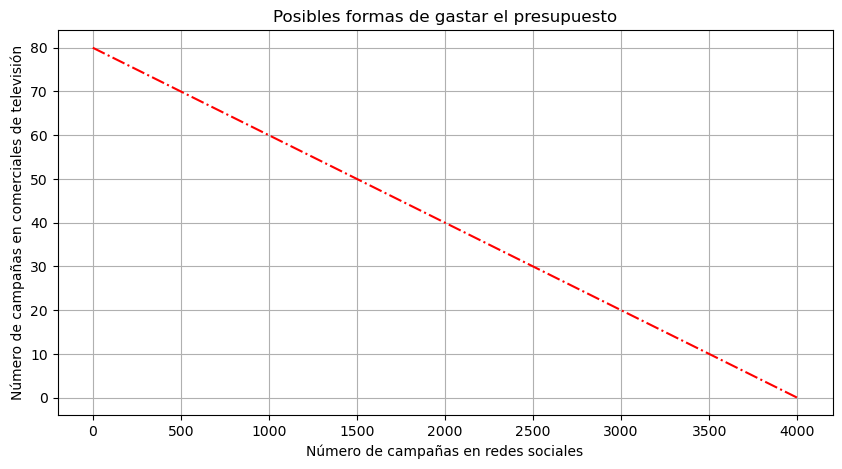

In [6]:
# Gráfica Lineal en Python
rd_x = np.linspace(rd_min, rd_max, 100)
tel_y = n_tel(rd_x, presupuesto)

plt.figure(figsize=(10,5))
plt.plot(rd_x, tel_y, '-.' , color = 'r')
plt.xlabel('Número de campañas en redes sociales')
plt.ylabel('Número de campañas en comerciales de televisión')
plt.title('Posibles formas de gastar el presupuesto')
plt.grid()
plt.show()

In [6]:
#Misma Gráfica en Julia
rd_x = range(rd_min, rd_max, 100);
tel_y = n_tel(rd_x, presupuesto);
plot(rd_x,tel_y,style =:dashdot, width = 2,
    color ="red",
    label ="Posibles formas de gastar el presupuesto",
    xlabel="Número de campañas en redes sociales",
    ylabel="Número de campañas en comerciales de televición" );

#### Importante

Las gráficas de Julia se cargaron como imágenes por el motivo de incompatibilidad en la generación de estas mismas con la conversión del cuaderno a PDF y la GitHub, para comprobar descargar el cuaderno y quitarle los ";" al código que esta al final de la función plot.

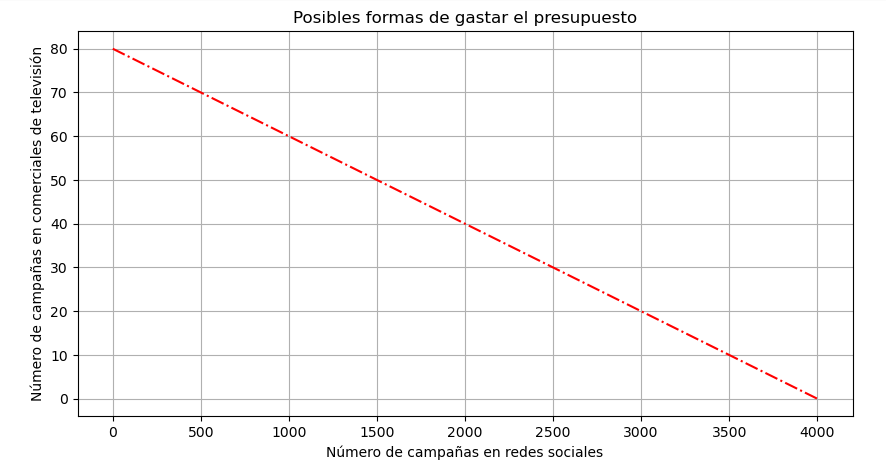

In [1]:
using Images
ruta=joinpath(pwd(),"1.png");
image=load(ruta)

# Función de ingresos (Función Objetivo)


Suponga que a través de la experimentación y el análisis, alguien ha podido identificar la curva de ingresos de su negocio y que se define como: 

Ingresos = **100** veces el número de campañas de redes sociales al elevada a **3/4** veces el número de campañas de televisión elevado a **1/4**. 

Esto se puede presentar en una función de Python de la siguiente manera:

\begin{gather*}
\sqrt[4]{rd^3\cdot tel}\cdot 100
\end{gather*}

In [7]:
# Definir función en Python
def ingresos(rd, tel):
    return rd**(3/4) * tel**(1/4) * 100

In [7]:
#Definir función en Julia (Se pone el punto para el caso si el numero que entra en la funcion es un vector)
function ingresos(rd,tel)
    return rd.^(0.75).*tel.^(0.25).*100
end;

# La representación 3D del problema.

En nuestro ejercicio, tenemos tres variables: los ingresos, el número de campañas sociales y el número de campañas de televisión sobre materiales.
Por supuesto, queremos maximizar los ingresos.

También tenemos una restricción presupuestaria que es la línea 2D que se muestra arriba: la cantidad máxima que podemos gastar.
El objetivo es encontrar el ingreso máximo siempre que esté por debajo del presupuesto.

Primero mostraré una representación 3D del problema en la que vemos:

- Los ingresos en 3D en función de las campañas sociales y de televisión.

- La línea de restricción presentada en 2D debajo del gráfico de ingresos.

El objetivo es identificar el punto más alto de la curva 3D que se encuentra exactamente en la línea de restricción.

Text(0.5, 0.92, 'Posibles formas de gastar el presupuesto')

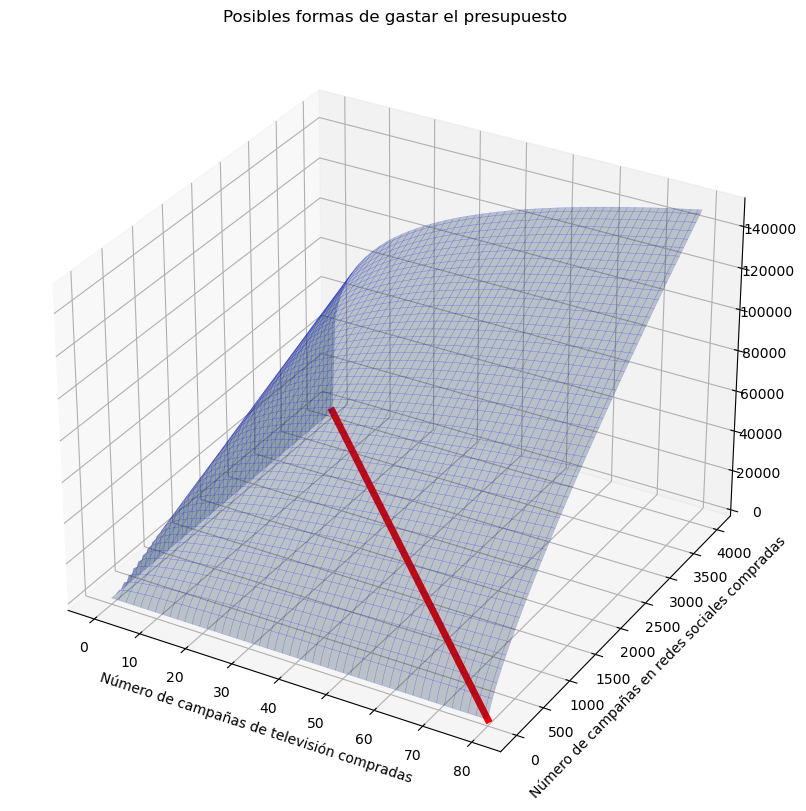

In [8]:
#Gráfica con Pyhton

from mpl_toolkits.mplot3d import Axes3D

rd_axis = np.linspace(rd_min, rd_max, 100)
tel_axis = np.linspace(tel_min, tel_max, 100)
rd_grid, tel_grid = np.meshgrid(rd_axis, tel_axis)

fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111, projection="3d")


ax.plot_surface(tel_grid, rd_grid,ingresos(rd_grid, tel_grid), alpha=0.25, edgecolor='blue', linewidth=.25, zorder=2)

ax.plot(tel_y, rd_x, linewidth = 5, color = 'r')

ax.set_ylabel('Número de campañas en redes sociales compradas')
ax.set_xlabel('Número de campañas de televisión compradas')
ax.set_title('Posibles formas de gastar el presupuesto')
# ax.view_init(52, -1)

In [8]:
#Gráfica en Julia
xs=range(rd_min,rd_max,100)
ys=range(tel_min,tel_max,100)
## zs es la funcion de ingresos se evalua primero en y para que los datos sean semejantes a los de Pyhton
zs= [x^(0.75) * y^(0.25) *100 for y in ys , x in xs]
plot(ys,xs,zs,st=:surface,alpha=0.5,legend=false,ylabel="x",xlabel="y");
#Donde x es Número de campañas en redes sociales compradas
#y es Número de campañas de television compradas

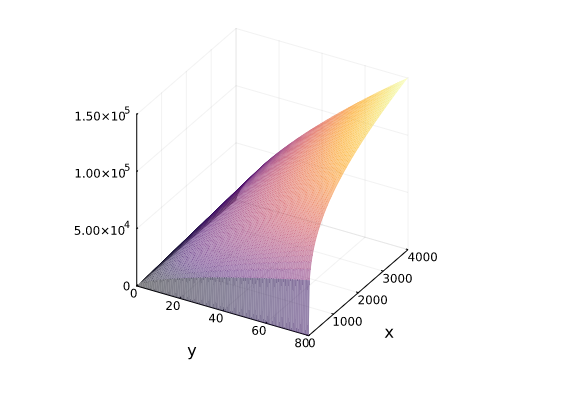

In [2]:
ruta2=joinpath(pwd(),"2.png");
image2=load(ruta2)

Las gráficas tiene un rango de Z diferente, esto se debe a que el gráfico de Python no esta utilizando todos los datos que resulta de la función de ingresos.

# La representación 2D del problema.


en lugar de agregar los ingresos en un eje Z, los ingresos ahora se representan como un degradado de contorno (derecha).
El objetivo sigue siendo el mismo: encontrar los ingresos más altos siempre que estén por debajo de la línea de restricción presupuestaria

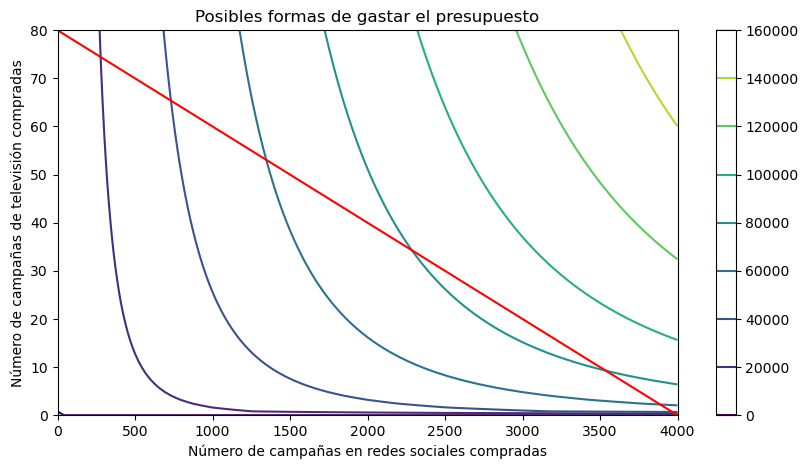

In [9]:
#Gráfica contorno en Python
fig= plt.figure(figsize = (10, 5))

ax_r=plt.subplot(111)
# Los contornos muestran cómo se ve la intersección

rd_axis = np.linspace(rd_min, rd_max, 100)
tel_axis = np.linspace(tel_min, tel_max, 100)
rd_grid, tel_grid = np.meshgrid(rd_axis, tel_axis)

im2 = ax_r.contour(ingresos(rd_grid,tel_grid), extent=[rd_min, rd_max, tel_min, tel_max])
ax_r.plot(rd_axis, n_tel(rd_axis, 40000000), 'r')
ax_r.set_xlabel('Número de campañas en redes sociales compradas')
ax_r.set_ylabel('Número de campañas de televisión compradas')
ax_r.set_title('Posibles formas de gastar el presupuesto')

plt.colorbar(im2,ax=ax_r)

plt.show()

In [9]:
#Gráfica contorno en Julia
plot(xs,ys,zs,st=:contour,alpha=0.6)
plot!(rd_x,tel_y,style =:dashdot, width = 2,
    color ="red",
    label ="Posibles formas de gastar el presupuesto",
    xlabel="Número de campañas en redes sociales",
    ylabel="Número de campañas en comerciales de televición" );


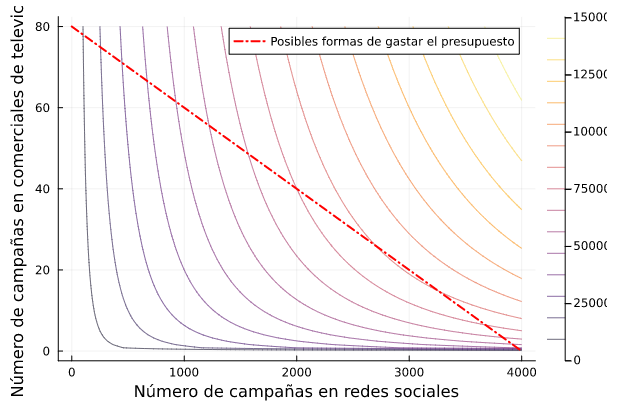

In [3]:
ruta3=joinpath(pwd(),"3.png");
image=load(ruta3)

El mismo caso que lo que pasa en la gráfica 3D, Python no esta abarcando todos los datos de la función de ingresos.

Si revisamos el gráfico (contorno), podemos leer que en la línea roja (presupuesto máximo), el valor de ingresos más alto sería aproximadamente alrededor de 3 comerciales de televisión y 70 campañas de redes sociales.

# DESARROLLO 

- Necesitamos encontrar el punto donde el contorno de ingresos es tangente a la línea de restricción.
- El método que usamos para esto es el multiplicador de Lagrange.
- podemos encontrar el máximo en el punto donde el gradiente del contorno de ingresos es proporcional al gradiente de la línea de restricción.

### "gradiente de ingresos" = lambda por "gradiente de restricción"

$$\nabla F(...) = \lambda\nabla g(...)$$

Esta lambda es el que conocemos como multiplicador de Lagrange.

### Función objetivo:
\begin{gather*}
F(r,t)=(r^{3/4}\cdot t^{1/4})\cdot 100\\
\end{gather*}

#### Derivadas parciales:
\begin{gather*}
\frac{\partial F}{\partial r}=\frac{3}{4}r^{-1/4}\cdot t^{1/4} \cdot100= 
\frac{300}{4}\cdot \frac{t^{1/4}}{r^{1/4}}\\
\\
\frac{\partial F}{\partial t}=r^{3/4}\cdot \frac{1}{4}t^{-3/4} \cdot100= 25\cdot \frac{r^{3/4}}{t^{3/4}}
\end{gather*}
### Restricción:
\begin{gather*}
q(r,t)=10000r+500000t=40000000cop\\
\end{gather*}
#### Derivadas parciales:
\begin{gather*}
\frac{\partial q}{\partial r}=10000 \\
\frac{\partial q}{\partial t}=500000 \\
\end{gather*}
#### Gradientes igualados con $\lambda$:
\begin{gather*}
\begin{bmatrix}
\frac{\partial F}{\partial r}=\lambda \frac{\partial q}{\partial r}
\end{bmatrix}
=\frac{300}{4}\cdot \frac{t^{1/4}}{r^{1/4}}=10000 \lambda \\
\begin{bmatrix}
\frac{\partial F}{\partial t}=\lambda \frac{\partial q}{\partial t}
\end{bmatrix}
=25\cdot \frac{r^{3/4}}{t^{3/4}}=500000 \lambda
\end{gather*}



#### Solver con Python

In [32]:
from sympy import *

r, t, l = symbols('r t l')

solve([Eq((75)*((t**(1/4))/r**(1/4)) - 10000*l, 0),
   Eq((25)*(r**(3/4)/t**(3/4)) - 500000*l, 0),
   Eq(10000*r+500000*t - 40000000, 0)], [r,t,l], simplify=False)

[(3000.00000000000, 20.0000000000000, 0.00214308032227410)]

#### Solver con Julia

In [11]:

using SymPy

@vars r t λ
f(r, t) = r^(0.75)* t^(1/4) *100
g(r, t) = 10000r+500000t
k = 40000000
L(r,t,λ) = f(r,t) - λ*(g(r,t) - k)
ds = solve(diff.(L(r,t,λ), [r, t, λ]))

1-element Vector{Dict{Any, Any}}:
 Dict(λ => 0.00214308032227410, r => 3000.00000000000, t => 20.0000000000000)

\begin{gather*}
\sqrt[4]{(3000)^3\cdot (20)}\cdot 100 = 85723.21
\end{gather*}

In [12]:
ingresos(3000,20)

85723.21289096399

# Conclusión

Como podemos observar ambos lenguajes nos da el mismo resultado, ya depende de cada persona decidir por cual lenguaje se inclinara a la hora de realizar sus estudios. Nosotros recomendamos usar Julia, ya que nos parece la más sencilla de entender, pero las librerias/bibliotecas no son tan intuitivas, aunque los paquetes de optimizacion de Julia son más rapidos a la hora de ejecutar el código. 